In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [25]:
# Cargar los datos desde el archivo JSON
ReporteLesionesPersonalesAccidentesCun = pd.read_json('/Users/mariagabrielamoreramurcia/Desktop/1er semestre MINE/SPMINE-2425/proyecto1/datos/datos_cundinamarca.json')

In [26]:
# Ver las primeras filas
print(ReporteLesionesPersonalesAccidentesCun.head())

   departamento         municipio  codigo_dane                 armas_medios  \
0  CUNDINAMARCA  BOGOTÁ D.C. (CT)     11001000           ALIMENTOS VENCIDOS   
1  CUNDINAMARCA  BOGOTÁ D.C. (CT)     11001000  ARMA BLANCA / CORTOPUNZANTE   
2  CUNDINAMARCA  BOGOTÁ D.C. (CT)     11001000  ARMA BLANCA / CORTOPUNZANTE   
3  CUNDINAMARCA  BOGOTÁ D.C. (CT)     11001000  ARMA BLANCA / CORTOPUNZANTE   
4  CUNDINAMARCA        FACATATIVÁ     25269000  ARMA BLANCA / CORTOPUNZANTE   

  fecha_hecho     genero  grupo_etario descripci_n_conducta  cantidad  
0   1/01/2021   FEMENINO       ADULTOS  LESIONES PERSONALES         1  
1   1/01/2021   FEMENINO       ADULTOS  LESIONES PERSONALES         4  
2   1/01/2021  MASCULINO  ADOLESCENTES  LESIONES PERSONALES         2  
3   1/01/2021  MASCULINO       ADULTOS  LESIONES PERSONALES        15  
4   1/01/2021  MASCULINO  ADOLESCENTES  LESIONES PERSONALES         1  


In [ ]:
# Analisis descriptivo sobre todas las variables
print(ReporteLesionesPersonalesAccidentesCun.describe(include='all'))

        departamento         municipio   codigo_dane         armas_medios  \
count         204436            204436  2.044360e+05               204436   
unique             1               234           NaN                   43   
top     CUNDINAMARCA  BOGOTÁ D.C. (CT)           NaN  SIN EMPLEO DE ARMAS   
freq          204436             81143           NaN                56948   
mean             NaN               NaN  1.874611e+07                  NaN   
std              NaN               NaN  7.230243e+06                  NaN   
min              NaN               NaN  1.100100e+07                  NaN   
25%              NaN               NaN  1.100100e+07                  NaN   
50%              NaN               NaN  2.515100e+07                  NaN   
75%              NaN               NaN  2.547300e+07                  NaN   
max              NaN               NaN  2.589900e+07                  NaN   

       fecha_hecho     genero grupo_etario descripci_n_conducta       canti

In [ ]:
# Volver la fecha en formato de tiempo
ReporteLesionesPersonalesAccidentesCun['fecha_hecho'] = pd.to_datetime(ReporteLesionesPersonalesAccidentesCun['fecha_hecho'], errors='coerce')

In [ ]:
#Volver la cantidad númerica
ReporteLesionesPersonalesAccidentesCun['cantidad'] = pd.to_numeric(ReporteLesionesPersonalesAccidentesCun['cantidad'], errors='coerce')

In [ ]:
# Revisamos los vacíos
print(ReporteLesionesPersonalesAccidentesCun.isnull().sum())

departamento                 0
municipio                    0
codigo_dane                  0
armas_medios                 0
fecha_hecho             121850
genero                       0
grupo_etario               375
descripci_n_conducta         0
cantidad                     0
dtype: int64


In [ ]:
# Unificamos los campos correspondientes a Bogotá para la variable municipio
ReporteLesionesPersonalesAccidentesCun['municipio'] = ReporteLesionesPersonalesAccidentesCun['municipio'].replace({'BOGOTÁ D.C. (CT)': 'Bogotá D.C. (CT)'})

In [67]:
# Unificamos los campos correspondientes a Bogotá para la variable municipio
ReporteLesionesPersonalesAccidentesCun['municipio'] = ReporteLesionesPersonalesAccidentesCun['municipio'].replace({'Soacha': 'SOACHA'})

In [70]:
# Unificamos los campos correspondientes a No Reportado para la variable grupo etario
ReporteLesionesPersonalesAccidentesCun['armas_medios'] = ReporteLesionesPersonalesAccidentesCun['armas_medios'].replace(
    {'NO REPORTA': 'NO REPORTADO',}
)

In [ ]:
# Unificamos los campos correspondientes a No Reportado para la variable grupo etario
ReporteLesionesPersonalesAccidentesCun['grupo_etario'] = ReporteLesionesPersonalesAccidentesCun['grupo_etario'].replace(
    {'NO REPORTA': 'NO REPORTADO', 'NO RESPORTADO': 'NO REPORTADO', '-': 'NO REPORTADO', 'NO REPOTADO': 'NO REPORTADO', 'NO-RESPORTADO': 'NO REPORTADO'}
)

In [ ]:
# Unificamos los campos correspondientes a No Reportado para la variable genero
ReporteLesionesPersonalesAccidentesCun['genero'] = ReporteLesionesPersonalesAccidentesCun['genero'].replace(
    {'NO REPORTA': 'NO REPORTADO', 'NO RESPORTADO': 'NO REPORTADO', '-': 'NO REPORTADO', 'NO REPOTADO': 'NO REPORTADO', 'NO-RESPORTADO': 'NO REPORTADO'}
)

In [ ]:
# Imputamos los datos de grupo etario para no tener tantos vacíos
moda_grupo_etario = ReporteLesionesPersonalesAccidentesCun['grupo_etario'].mode()[0]
ReporteLesionesPersonalesAccidentesCun['grupo_etario'].fillna(moda_grupo_etario, inplace=True)

/var/folders/q2/rwr476f55fbdwphjs1sgh2vh0000gn/T/ipykernel_9879/346007507.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ReporteLesionesPersonalesAccidentesCun['grupo_etario'].fillna(moda_grupo_etario, inplace=True)


In [33]:
# Verificar las primeras filas y la información general
def explorar_datos(df):
    print("Primeras filas del DataFrame:")
    print(df.head())
    print("\nInformación general:")
    print(df.info())
    print("\nValores nulos por columna:")
    print(df.isnull().sum())

In [15]:
explorar_datos(ReporteLesionesPersonalesAccidentesCun)

Primeras filas del DataFrame:
   departamento         municipio  codigo_dane                 armas_medios  \
0  CUNDINAMARCA  BOGOTÁ D.C. (CT)     11001000           ALIMENTOS VENCIDOS   
1  CUNDINAMARCA  BOGOTÁ D.C. (CT)     11001000  ARMA BLANCA / CORTOPUNZANTE   
2  CUNDINAMARCA  BOGOTÁ D.C. (CT)     11001000  ARMA BLANCA / CORTOPUNZANTE   
3  CUNDINAMARCA  BOGOTÁ D.C. (CT)     11001000  ARMA BLANCA / CORTOPUNZANTE   
4  CUNDINAMARCA        FACATATIVÁ     25269000  ARMA BLANCA / CORTOPUNZANTE   

  fecha_hecho     genero  grupo_etario descripci_n_conducta  cantidad  
0  2021-01-01   FEMENINO       ADULTOS  LESIONES PERSONALES         1  
1  2021-01-01   FEMENINO       ADULTOS  LESIONES PERSONALES         4  
2  2021-01-01  MASCULINO  ADOLESCENTES  LESIONES PERSONALES         2  
3  2021-01-01  MASCULINO       ADULTOS  LESIONES PERSONALES        15  
4  2021-01-01  MASCULINO  ADOLESCENTES  LESIONES PERSONALES         1  

Información general:
<class 'pandas.core.frame.DataFrame'>
Ran

In [68]:
# Análisis de distribución de incidentes por municipio
def analizar_municipios(df):
    top_municipios = df['municipio'].value_counts().head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_municipios.index, y=top_municipios.values, palette='viridis')
    plt.xticks(rotation=45)
    plt.title('Top 10 Municipios con más Incidentes')
    plt.xlabel('Municipio')
    plt.ylabel('Número de Incidentes')
    plt.show()

/var/folders/q2/rwr476f55fbdwphjs1sgh2vh0000gn/T/ipykernel_9879/764987212.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_municipios.index, y=top_municipios.values, palette='viridis')


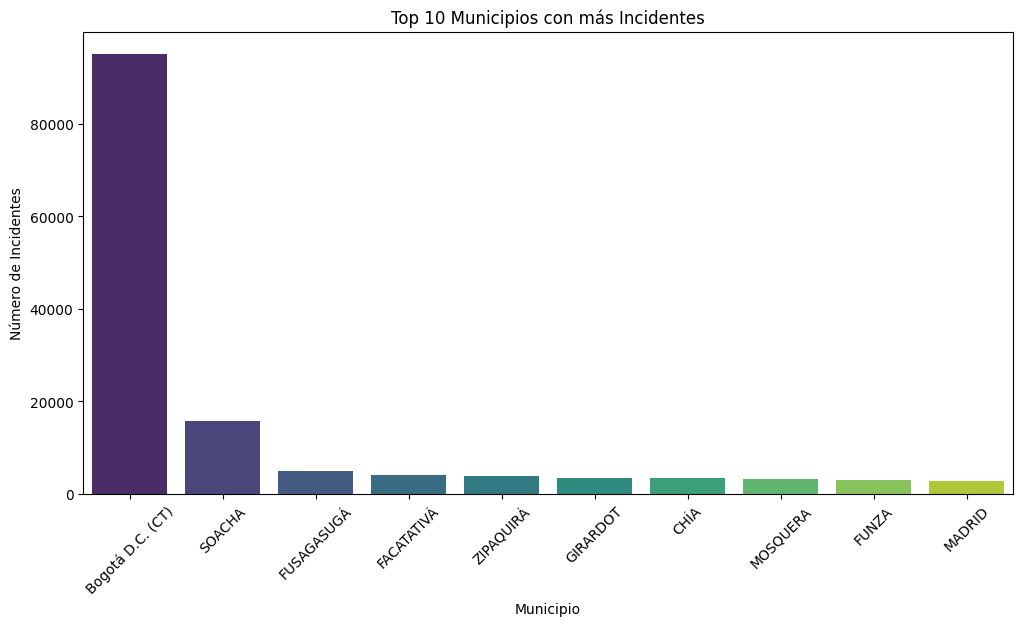

In [69]:
analizar_municipios(ReporteLesionesPersonalesAccidentesCun)

In [57]:
# Análisis de distribución por género y grupo etario
def analizar_demografia(df):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x='genero', palette='coolwarm')
    plt.title('Distribución de Incidentes por Género')
    plt.show()
    
    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, y='grupo_etario', order=df['grupo_etario'].value_counts().index, palette='magma')
    plt.title('Distribución de Incidentes por Grupo Etario')
    plt.show()

/var/folders/q2/rwr476f55fbdwphjs1sgh2vh0000gn/T/ipykernel_9879/2522865504.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='genero', palette='coolwarm')


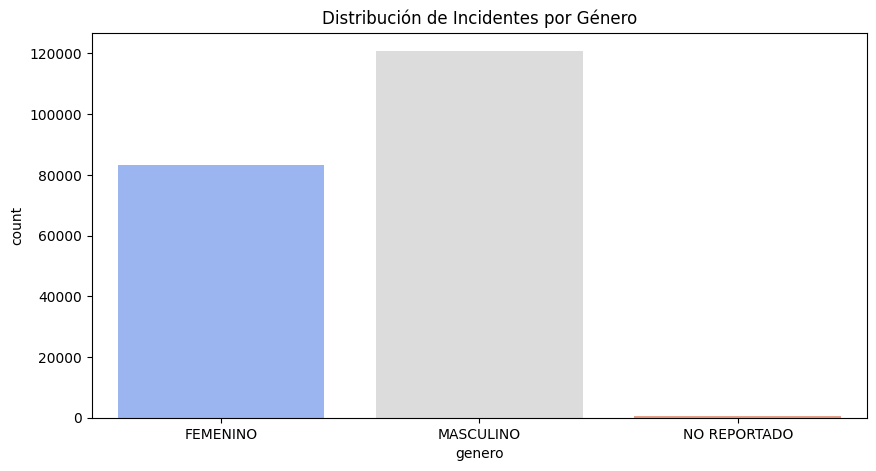

/var/folders/q2/rwr476f55fbdwphjs1sgh2vh0000gn/T/ipykernel_9879/2522865504.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='grupo_etario', order=df['grupo_etario'].value_counts().index, palette='magma')


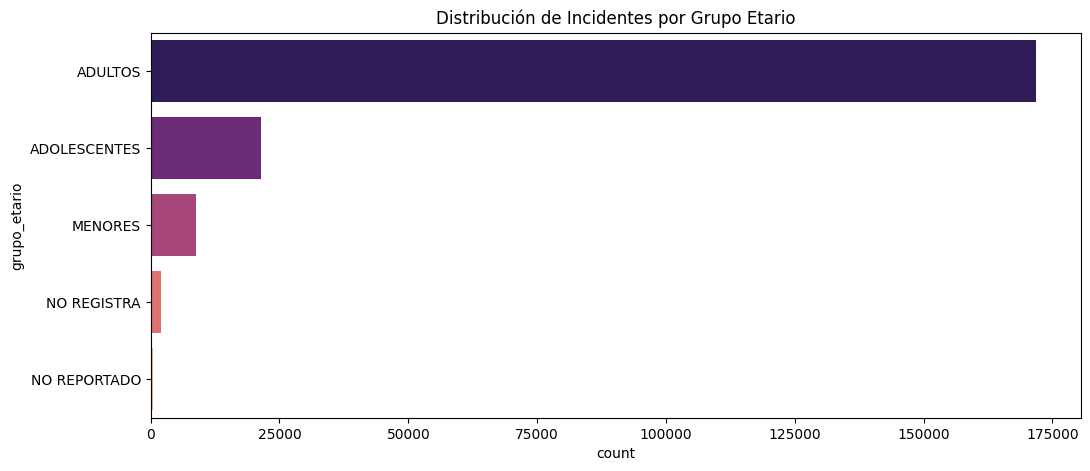

In [58]:
analizar_demografia(ReporteLesionesPersonalesAccidentesCun)

In [61]:
# Análisis temporal de incidentes
def analizar_tendencias(df):
    df['año'] = df['fecha_hecho'].dt.year
    df['mes'] = df['fecha_hecho'].dt.to_period('M')
    
    # Tendencia anual
    anual = df.groupby('año')['cantidad'].sum()
    plt.figure(figsize=(10, 5))
    anual.plot(marker='o', color='b')
    plt.title('Tendencia de Incidentes a lo Largo de los Años')
    plt.xlabel('Año')
    plt.ylabel('Cantidad de Incidentes')
    plt.grid()
    plt.show()
    
    # Tendencia mensual
    mensual = df.groupby('mes')['cantidad'].sum()
    plt.figure(figsize=(12, 5))
    mensual.plot(marker='o', linestyle='-', color='r')
    plt.title('Tendencia Mensual de Incidentes')
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad de Incidentes')
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

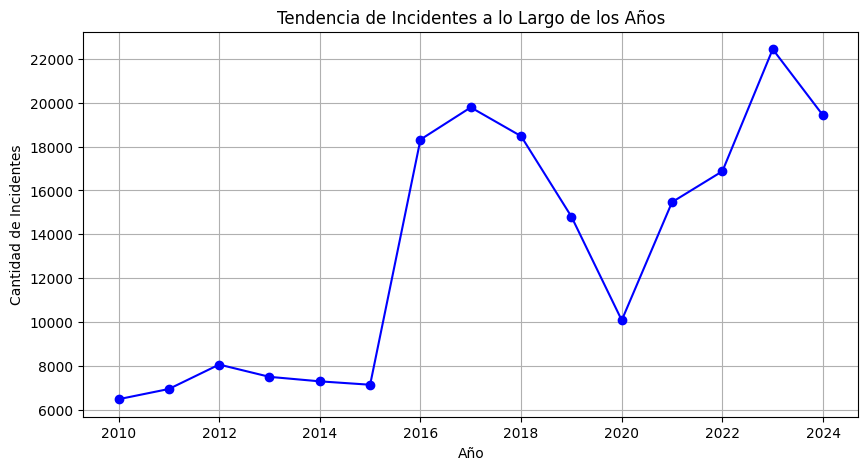

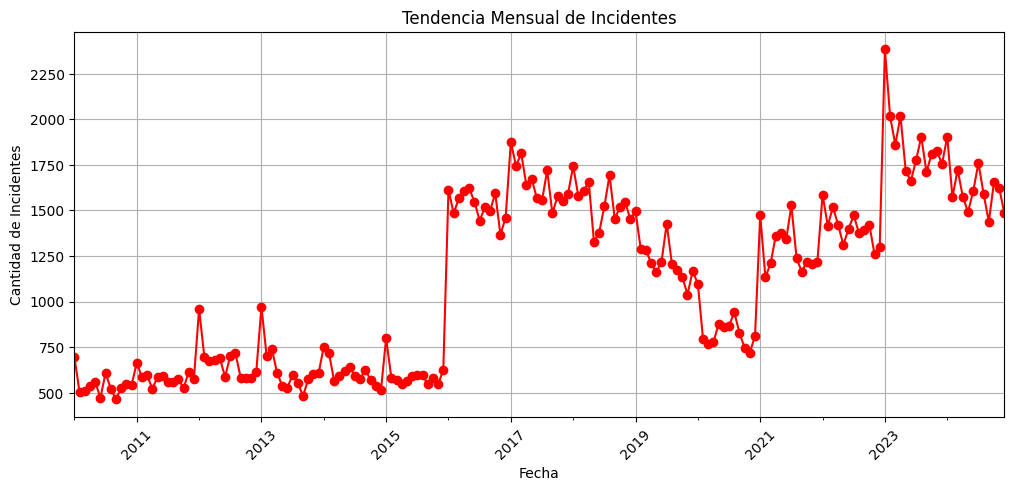

In [62]:
analizar_tendencias(ReporteLesionesPersonalesAccidentesCun)

In [71]:
# Análisis de descripción de conducta
def analizar_descripcion_conducta(df):
    top_conductas = df['armas_medios'].value_counts().head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_conductas.values, y=top_conductas.index, palette='Blues_r')
    plt.xlabel('Frecuencia')
    plt.ylabel('Descripción de la Conducta')
    plt.title('Top 10 Descripciones de Conductas Reportadas')
    plt.show()

/var/folders/q2/rwr476f55fbdwphjs1sgh2vh0000gn/T/ipykernel_9879/2547970972.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_conductas.values, y=top_conductas.index, palette='Blues_r')


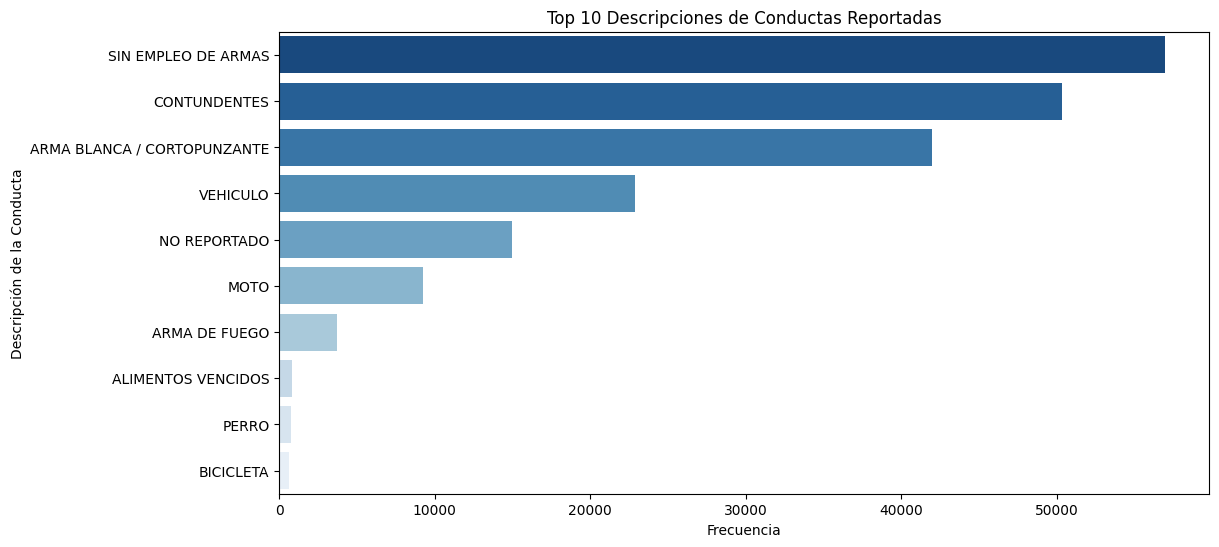

In [ ]:
analizar_descripcion_conducta(ReporteLesionesPersonalesAccidentesCun)